# Models

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn import metrics
from pandas_ml import ConfusionMatrix
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import os
import sklearn
import seaborn as sns
import pickle
import itertools
import numpy as np 
import nltk
import string
import pandas as pd
import re
from sklearn.linear_model  import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

df = pd.read_csv(os.getcwd()+'\CleanData.csv', encoding = 'utf-8')

df.head()

,ID,Title,Publication,Author,Published,Year,Month,Category,URL,Content,Label
0,50314,WhatsNewsBusinessFinance,WSJ,Journalist,01/02/18,2018,1,Whats News Business Finance,https://www.wsj.com/articles/whats-news-busine...,The unemployment rate in some metro areas stan...,Real
1,60334,ABrowserYouveNeverHeardofIsDethroningGoogleinAsia,WSJ,"NewleyPurnell,NewleyPurnellWsjCom",01/01/18,2018,1,Tech,https://www.wsj.com/articles/a-browser-youve-n...,JAKARTA IndonesiaA mobile browser rarely used ...,Real
2,92197,MarkedSafestYearinCommercialAviationHistory,WSJ,"AndyPasztor,AndyPasztorWsjCom",01/02/18,2018,1,U.S.,https://www.wsj.com/articles/2017-marked-safes...,The global airline industry achieved a previou...,Real
3,83175,FiveThingstoKnowAbouttheIranianProtests,WSJ,"FarnazFassihi,FarnazFassihiWsjCom",12/31/17,2017,12,World,https://www.wsj.com/articles/economics-dissati...,Protests erupted across Iran for a third day o...,Real
4,41508,PhotosoftheDayJan,WSJ,Journalist,01/01/18,2018,1,None,https://www.wsj.com/articles/photos-of-the-day...,Photos of the Day Jan Children warm up by a fi...,Real


# Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
import pickle

Content = df['Content'].values 

Labels = df['Label'].values

print(Labels)

le = LabelEncoder()
le.fit(Labels)
Labels = le.transform(Labels)

print(Labels)

X_train, X_test, y_train, y_test = train_test_split(Content, Labels, test_size=0.33, random_state=53)

['Real' 'Real' 'Real' ... 'Fake' 'Fake' 'Fake']
[1 1 1 ... 0 0 0]


# Stopwords

In [43]:
import nltk
from nltk.corpus import stopwords 

porter_stemmer = nltk.stem.porter.PorterStemmer()

#spilts the sentences into words
def porter_tokenizer(text, stemmer=porter_stemmer):
    lower_txt = text.lower()
    tokens = nltk.wordpunct_tokenize(lower_txt)
    stems = [porter_stemmer.stem(t) for t in tokens]
    no_punct = [s for s in stems if re.match('^[a-zA-Z]+$', s) is not None]
    return no_punct

stop_words = set(stopwords.words('english')) 

# Count Vectorization

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english',
                                   encoding='utf-8',
                                   decode_error='replace',
                                   strip_accents='unicode',
                                   analyzer='word',
                                   tokenizer=porter_tokenizer,
                                   ngram_range=(1,2),
                                   binary=False)
#testing the implementation
con = df['Content'].loc[1]
con = [con]

vect = count_vectorizer.fit(con)
print(vect)

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

# Get the feature names of `count_vectorizer` 
# print(count_vectorizer.get_feature_names()[30:])

# TFIDF Vectorization 

In [45]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english',
                                   encoding='utf-8',
                                   decode_error='replace',
                                   strip_accents='unicode',
                                   analyzer='word',
                                   tokenizer=porter_tokenizer,
                                   ngram_range=(1,2),
                                   binary=False)

# # Fit and transform the training data 
# tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# # Transform the test set 
# tfidf_test = tfidf_vectorizer.transform(X_test)

#testing the implementation
tfcon = df['Content'].loc[1]
tfcon = [tfcon]

tfvect = tfidf_vectorizer.fit(con)
print(tfvect)

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Get the feature names of `count_vectorizer` 
# print(tfidf_vectorizer.get_feature_names()[30:])

C:\Users\Reema Mehta\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
 

TfidfVectorizer(analyzer='word', binary=False, decode_error='replace',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function porter_tokenizer at 0x000001D28E127A60>,
        use_idf=True, vocabulary=None)


# Functions for Precision, Recall, F1 Score, Error Rate, Accuracy, and ROC

F1-score (from 0 to 9, 0 being lowest and 9 being the highest) is a mean of an individual’s performance, based on two factors i.e. precision and recall

Error Rate Should be close to 0

Accuracy should be close to 1

ROC Should be close to 1

In [52]:
# Confusion Matrix
import matplotlib as mp

def evaluation(cm):
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    #Calculating precision
    def Precision_Cal(TP,FP):
        return TP/(TP+FP)

    #Calculating recall
    def Recall_Cal(TP,FN):
        return TP/(TP+FN)

    #Calculating F1 score
    def F1_Cal(precision,recall):
        f1 = 2*((precision * recall)/(precision+recall))
        print('F1 Score = ', f1)
        print('F1 % = ', f1*100)

    #Calculating Error Rate
    def Err_Cal(TP,FP,FN,TN):
        return ((FP+FN)/(TP+FP+FN+TN))

    precision = Precision_Cal(TP,FP)
    print('Precision = ', precision)

    recall = Recall_Cal(TP,FN)
    print('Recall = ', recall)

    F1_Cal(precision,recall)

    Err_Rate = Err_Cal(TP,FP,FN,TN)
    print('Error Rate = ', Err_Rate)

    #Accuracy is 1-error rate
    print('Accuracy = ', 1-Err_Rate)
    
def rocCurve(y_true, y_pred, roc):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    
def plotConfusionMatrix(cm):
    np.set_printoptions(suppress=True)
    mp.rc("figure", figsize=(4, 2))

    hm = sns.heatmap(cm, 
                cbar=False,
                annot=True, 
                square=True,
                fmt='d',
                yticklabels=['fake','real'],
                xticklabels=['fake','real'],
                cmap='Blues'
                )
    plt.title('Confusion matrix - Validation dataset')
    plt.ylabel('actual class')
    plt.xlabel('predicted class')
    plt.tight_layout()
    plt.savefig('confmat_valid.eps', dpi=300)
    plt.show()

# Multinomial Naive Bayes

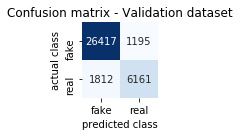

Precision =  0.9567217151962915
Recall =  0.9358106911332318
F1 Score =  0.9461506778173744
F1 % =  94.61506778173744
Error Rate =  0.0845018968666573
Accuracy =  0.9154981031333427
ROC-AUC 0.8647273444914105


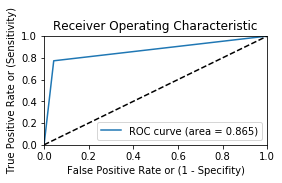

In [53]:
#our model to be used
clf1 = MultinomialNB()

#training with count vectorizor
clf1.fit(count_train, y_train)                       # Fit classifier according to X, y

predcv = clf1.predict(count_test)                     # Perform classification on an array of test vectors X.

#Calculating score for ROC_AUC
roc_auc = roc_auc_score(y_test, predcv, average= 'micro')

#confusion matrix for count vector
cmcv = metrics.confusion_matrix(y_test, predcv, labels=[0,1])

#plot the confusion Matrix
plotConfusionMatrix(cmcv)

rocCurve(y_test, predcv, roc_auc)

#Evaluation
evaluation(cmcv)

print("ROC-AUC", roc_auc)

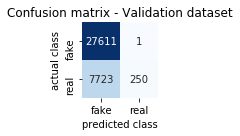

Precision =  0.999963783862089
Recall =  0.7814286522895795
F1 Score =  0.8772916468083755
F1 % =  87.72916468083754
Error Rate =  0.21705774905156666
Accuracy =  0.7829422509484334
ROC-AUC 0.5156598048872717


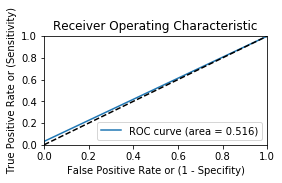

In [54]:
#our model to be used
clf2 = MultinomialNB()


clf2.fit(tfidf_train, y_train)                       # Fit classifier according to X, y

predtf = clf2.predict(tfidf_test)                     # Perform classification on an array of test vectors X.

tf_roc_auc = roc_auc_score(y_test, predtf, average= 'micro')


cmtf = metrics.confusion_matrix(y_test, predtf, labels=[0,1])

plotConfusionMatrix(cmtf)

rocCurve(y_test, predtf, tf_roc_auc)

#plot the confusion Matrix

#Evaluation
evaluation(cmtf)
print("ROC-AUC", tf_roc_auc)

# Random Forest

C:\Users\Reema Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


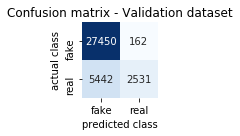

Precision =  0.9941329856584094
Recall =  0.8345494345129515
F1 Score =  0.9073780245934152
F1 % =  90.73780245934152
Error Rate =  0.1574820851482366
Accuracy =  0.8425179148517634
ROC-AUC 0.6557896835980495


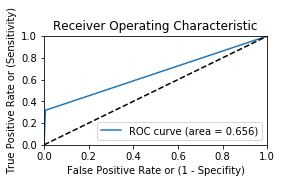

In [56]:
#our model to be used
clf1 = RandomForestClassifier() 

clf1.fit(count_train, y_train)                       # Fit classifier according to X, y

predcv = clf1.predict(count_test)                     # Perform classification on an array of test vectors X.

roc_auc = roc_auc_score(y_test, predcv, average= 'micro')

#confusion matrix for count vector
cmcv = metrics.confusion_matrix(y_test, predcv, labels=[0,1])

#plot the confusion Matrix
plotConfusionMatrix(cmcv)

rocCurve(y_test, predcv, roc_auc)

#Evaluation
evaluation(cmcv)

print("ROC-AUC", roc_auc)

C:\Users\Reema Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


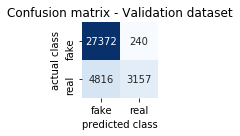

Precision =  0.9913081269013473
Recall =  0.8503790232384739
F1 Score =  0.9154515050167222
F1 % =  91.54515050167223
Error Rate =  0.14208233806379092
Accuracy =  0.8579176619362091
ROC-AUC 0.6936347482619116


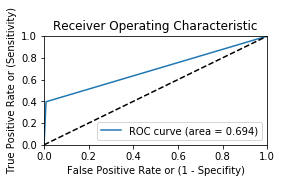

In [57]:
#our model to be used
clf2 = RandomForestClassifier()

# print("TfIdf Vectorization")
clf2.fit(tfidf_train, y_train)                       # Fit classifier according to X, y

predtf = clf2.predict(tfidf_test)                     # Perform classification on an array of test vectors X.

tf_roc_auc = roc_auc_score(y_test, predtf, average= 'micro')
#confusion matrix for tfidf
cmtf = metrics.confusion_matrix(y_test, predtf, labels=[0,1])

plotConfusionMatrix(cmtf)

rocCurve(y_test, predtf, tf_roc_auc)

#plot the confusion Matrix

#Evaluation
evaluation(cmtf)
print("ROC-AUC", tf_roc_auc)

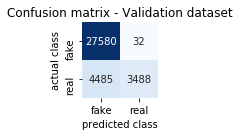

Precision =  0.9988410835868463
Recall =  0.8601278652736629
F1 Score =  0.9243091978484173
F1 % =  92.43091978484172
Error Rate =  0.12693550653365182
Accuracy =  0.8730644934663482
ROC-AUC 0.718158783358706


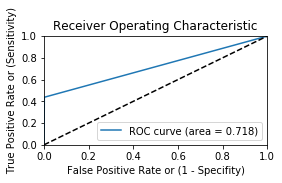

In [58]:
#our model to be used
clf2 = RandomForestClassifier(n_estimators=100, random_state=12)

# print("TfIdf Vectorization")
clf2.fit(tfidf_train, y_train)                       # Fit classifier according to X, y

predtf = clf2.predict(tfidf_test)                     # Perform classification on an array of test vectors X.

tf_roc_auc = roc_auc_score(y_test, predtf, average= 'micro')
#confusion matrix for tfidf
cmtf = metrics.confusion_matrix(y_test, predtf, labels=[0,1])

plotConfusionMatrix(cmtf)

rocCurve(y_test, predtf, tf_roc_auc)

#plot the confusion Matrix

#Evaluation
evaluation(cmtf)
print("ROC-AUC", tf_roc_auc)

# Support Vector Machine

C:\Users\Reema Mehta\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


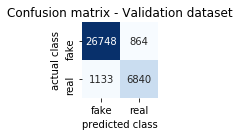

Precision =  0.9687092568448501
Recall =  0.9593630070657437
F1 Score =  0.9640134791775539
F1 % =  96.40134791775539
Error Rate =  0.05611915132780666
Accuracy =  0.9438808486721934
ROC-AUC 0.9133023269048031


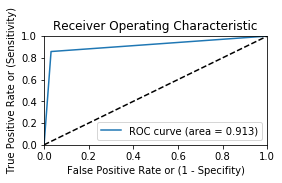

In [59]:
#our model to be used
clf1 = svm.LinearSVC() 

clf1.fit(count_train, y_train)                       # Fit classifier according to X, y

predcv = clf1.predict(count_test)                     # Perform classification on an array of test vectors X.

roc_auc = roc_auc_score(y_test, predcv, average= 'micro')

#confusion matrix for count vector
cmcv = metrics.confusion_matrix(y_test, predcv, labels=[0,1])

#plot the confusion Matrix
plotConfusionMatrix(cmcv)

rocCurve(y_test, predcv, roc_auc)

#Evaluation
evaluation(cmcv)

print("ROC-AUC", roc_auc)

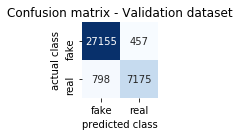

Precision =  0.9834492249746487
Recall =  0.9714520802776089
F1 Score =  0.9774138396472599
F1 % =  97.741383964726
Error Rate =  0.035267668961641144
Accuracy =  0.9647323310383589
ROC-AUC 0.9416807143310469


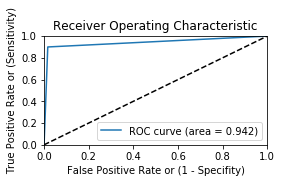

In [60]:
#our model to be used
clf2 = svm.LinearSVC()

# print("TfIdf Vectorization")
clf2.fit(tfidf_train, y_train)                       # Fit classifier according to X, y

predtf = clf2.predict(tfidf_test)                     # Perform classification on an array of test vectors X.

tf_roc_auc = roc_auc_score(y_test, predtf, average= 'micro')
#confusion matrix for tfidf
cmtf = metrics.confusion_matrix(y_test, predtf, labels=[0,1])

plotConfusionMatrix(cmtf)

rocCurve(y_test, predtf, tf_roc_auc)

#plot the confusion Matrix

#Evaluation
evaluation(cmtf)
print("ROC-AUC", tf_roc_auc)

# SVM Model using KFold Cross Validation

In [61]:
#K fold Cross Validation

#Defining the split into 5 Fold
from sklearn.model_selection import StratifiedKFold

le = LabelEncoder()
le.fit(df['Label'])

df_labels = pd.DataFrame(np.array(le.transform(df['Label'])))

skf = StratifiedKFold(n_splits = 5)

for trn_indx, tst_indx in skf.split(df['Content'],df_labels):
    skf_X_train, skf_X_test = df['Content'].iloc[trn_indx], df['Content'].iloc[tst_indx]
    skf_Y_train, skf_Y_test = df_labels.iloc[trn_indx], df_labels.iloc[tst_indx]

In [62]:
# Fit and transform the training data for count vector
skf_count_train = count_vectorizer.fit_transform(skf_X_train)

# Transform the test set 
skf_count_test = count_vectorizer.transform(skf_X_test)

# Fit and transform the training data for tfidf
skf_tfidf_train = tfidf_vectorizer.fit_transform(skf_X_train)

# Transform the test set 
skf_tfidf_test = tfidf_vectorizer.transform(skf_X_test)

C:\Users\Reema Mehta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Reema Mehta\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


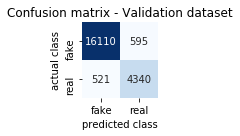

Precision =  0.9643819215803652
Recall =  0.9686729601346883
F1 Score =  0.9665226781857451
F1 % =  96.65226781857451
Error Rate =  0.05174812204395808
Accuracy =  0.9482518779560419
ROC-AUC 0.9286011644519806


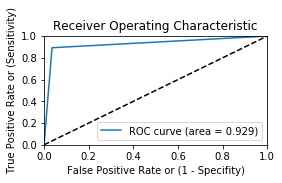

In [63]:
skf_clf1 = svm.LinearSVC() 

skf_clf1.fit(skf_count_train, skf_Y_train)                       # Fit SVM classifier according to X, y

skf_predcv = skf_clf1.predict(skf_count_test)                     # Perform classification on an array of test vectors X.

skf_cv_roc_auc = roc_auc_score(skf_Y_test, skf_predcv, average= 'micro')

#confusion matrix for count vector
skf_cm_cv = metrics.confusion_matrix(skf_Y_test, skf_predcv, labels=[0,1])


#plot the confusion Matrix
plotConfusionMatrix(skf_cm_cv)

rocCurve(skf_Y_test, skf_predcv, skf_cv_roc_auc)


#Evaluation
evaluation(skf_cm_cv)

print("ROC-AUC", skf_cv_roc_auc)

C:\Users\Reema Mehta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


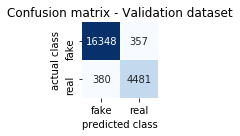

Precision =  0.9786291529482191
Recall =  0.9772835963653754
F1 Score =  0.9779559118236474
F1 % =  97.79559118236475
Error Rate =  0.034174163034406006
Accuracy =  0.965825836965594
ROC-AUC 0.9502279687802193


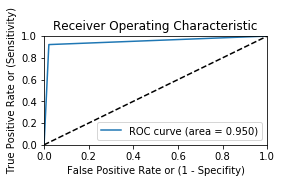

In [64]:
# print("TfIdf Vectorization")
skf_clf2 = svm.LinearSVC()

skf_clf2.fit(skf_tfidf_train, skf_Y_train)                       # Fit SVM classifier according to X, y

skf_predtf = skf_clf2.predict(skf_tfidf_test)                     # Perform classification on an array of test vectors X.

skf_tf_roc_auc = roc_auc_score(skf_Y_test, skf_predtf, average= 'micro')

#confusion matrix for count vector
skf_tf_cm = metrics.confusion_matrix(skf_Y_test, skf_predtf, labels=[0,1])

#plot the confusion Matrix
plotConfusionMatrix(skf_tf_cm)

rocCurve(skf_Y_test, skf_predtf, skf_tf_roc_auc)

#Evaluation
evaluation(skf_tf_cm)

print("ROC-AUC", skf_tf_roc_auc)

# Logistic Regression

C:\Users\Reema Mehta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


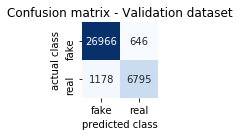

Precision =  0.9766043749094596
Recall =  0.9581438317225697
F1 Score =  0.9672860319965565
F1 % =  96.72860319965565
Error Rate =  0.051257552339468875
Accuracy =  0.9487424476605312
ROC-AUC 0.9144278616049868


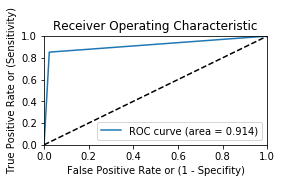

In [66]:
#our model to be used
clf1 = LogisticRegression() 

clf1.fit(count_train, y_train)                       # Fit classifier according to X, y

predcv = clf1.predict(count_test)                     # Perform classification on an array of test vectors X.

roc_auc = roc_auc_score(y_test, predcv, average= 'micro')

#confusion matrix for count vector
cmcv = metrics.confusion_matrix(y_test, predcv, labels=[0,1])

#plot the confusion Matrix
plotConfusionMatrix(cmcv)

rocCurve(y_test, predcv, roc_auc)

#Evaluation
evaluation(cmcv)

print("ROC-AUC", roc_auc)

C:\Users\Reema Mehta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


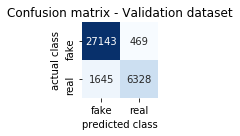

Precision =  0.9830146313197161
Recall =  0.9428581353341671
F1 Score =  0.9625177304964541
F1 % =  96.25177304964541
Error Rate =  0.05940705353379233
Accuracy =  0.9405929464662077
ROC-AUC 0.8883466484078827


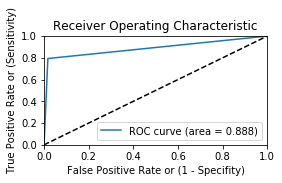

In [67]:
#our model to be used
clf2 = LogisticRegression()

# print("TfIdf Vectorization")
clf2.fit(tfidf_train, y_train)                       # Fit classifier according to X, y

predtf = clf2.predict(tfidf_test)                     # Perform classification on an array of test vectors X.

tf_roc_auc = roc_auc_score(y_test, predtf, average= 'micro')
#confusion matrix for tfidf
cmtf = metrics.confusion_matrix(y_test, predtf, labels=[0,1])

plotConfusionMatrix(cmtf)

rocCurve(y_test, predtf, tf_roc_auc)

#plot the confusion Matrix

#Evaluation
evaluation(cmtf)
print("ROC-AUC", tf_roc_auc)

# XGBoost

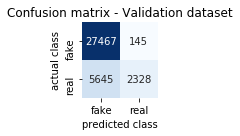

Precision =  0.9947486600028973
Recall =  0.8295179995167915
F1 Score =  0.9046505500296423
F1 % =  90.46505500296423
Error Rate =  0.16270900660390614
Accuracy =  0.8372909933960939
ROC-AUC 0.6433670554498371


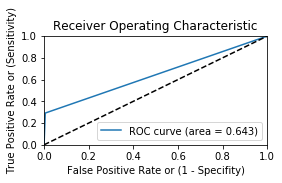

In [68]:
clf1 = GradientBoostingClassifier(learning_rate=0.15, n_estimators=100, min_samples_split=0.5, min_samples_leaf=45, max_depth=8,max_features ='sqrt',subsample =0.8)

clf1.fit(count_train, y_train)                       # Fit classifier according to X, y

predcv = clf1.predict(count_test)                     # Perform classification on an array of test vectors X.

roc_auc = roc_auc_score(y_test, predcv, average= 'micro')

#confusion matrix for count vector
cmcv = metrics.confusion_matrix(y_test, predcv, labels=[0,1])

#plot the confusion Matrix
plotConfusionMatrix(cmcv)

rocCurve(y_test, predcv, roc_auc)

#Evaluation
evaluation(cmcv)

print("ROC-AUC", roc_auc)



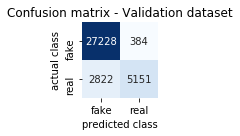

Precision =  0.9860930030421556
Recall =  0.906089850249584
F1 Score =  0.9444001248655961
F1 % =  94.44001248655961
Error Rate =  0.09009414078965856
Accuracy =  0.9099058592103414
ROC-AUC 0.8160742200711845


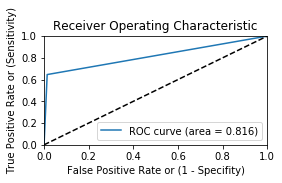

In [69]:
clf1 = GradientBoostingClassifier()

clf1.fit(count_train, y_train)                       # Fit classifier according to X, y

predcv = clf1.predict(count_test)                     # Perform classification on an array of test vectors X.

roc_auc = roc_auc_score(y_test, predcv, average= 'micro')

#confusion matrix for count vector
cmcv = metrics.confusion_matrix(y_test, predcv, labels=[0,1])

#plot the confusion Matrix
plotConfusionMatrix(cmcv)

rocCurve(y_test, predcv, roc_auc)

#Evaluation
evaluation(cmcv)

print("ROC-AUC", roc_auc)


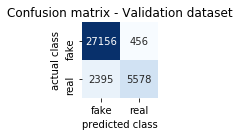

Precision =  0.9834854411125598
Recall =  0.9189536733105479
F1 Score =  0.9501250809089795
F1 % =  95.01250809089795
Error Rate =  0.08011802725867641
Accuracy =  0.9198819727413236
ROC-AUC 0.8415483144356226


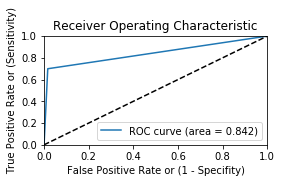

In [70]:
#our model to be used
clf2 = GradientBoostingClassifier()

# print("TfIdf Vectorization")
clf2.fit(tfidf_train, y_train)                       # Fit classifier according to X, y

predtf = clf2.predict(tfidf_test)                     # Perform classification on an array of test vectors X.

tf_roc_auc = roc_auc_score(y_test, predtf, average= 'micro')
#confusion matrix for tfidf
cmtf = metrics.confusion_matrix(y_test, predtf, labels=[0,1])

plotConfusionMatrix(cmtf)

rocCurve(y_test, predtf, tf_roc_auc)

#plot the confusion Matrix

#Evaluation
evaluation(cmtf)
print("ROC-AUC", tf_roc_auc)

We have implemented Random Forest , Multinomial Naive Bayes , Logistic Regression , Support Vector Machine(with 5 fold cross validation) and XGBoost Models for both Count and TFIDF Vectorization.

Output for Support Vector Machine(with 5 fold cross validation) using TFIDF Vectorization is providing below values.

Precision =  0.9786291529482191

Recall =  0.9772835963653754

F1 Score =  0.9779559118236474

F1 % =  97.79559118236475

Error Rate =  0.034174163034406006

Accuracy =  0.965825836965594

ROC-AUC 0.9502279687802193

Which is higher than any other values , and we are using SVM model for our final prediction.